## Problem statement

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual value and flip them at a higher price. For the same purpose, the company has collected a data set from house sales in Australia. The company is looking at prospective properties to buy to enter the market. The obective of the study is to build a regression model using regularization, so as to predict the actual value of the prospective properties and decide whether to invest in them or not

### Business objective:


- Build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.
- Determine the optimal value of lambda for ridge and lasso regression.
- This model will then be used by the management to understand how exactly the prices vary with the variables
- They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns.
- The model will be a good way for the management to understand the pricing dynamics of a new market.


In [1]:
## Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
## Import the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [3]:
pd.set_option('display.max_rows', 1500)

## 01. Data import 

In [4]:
## importing from the csv file
df_house_price = pd.read_csv('train.csv')

In [5]:
## checking the dimension of the data set
df_house_price.shape

(1460, 81)

In [6]:
## Checking the top rows
df_house_price.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [7]:
## Checking the columns in the dataframe
df_house_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

## 02. Data understanding and exploration

**checking numerical columns**

In [8]:
## checking the numerical columns
df_house_price.describe([0.25,0.50,0.75,0.99])

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
99%    1445.410000   190.000000   141.000000   37567.640000    10.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ...   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000  ...   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000  ...   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000  ...   
99%       9.000000  2009.000000   2009.000000   791.920000  1572.410000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
99%     505.460000   285.820000     261.050000   168.000000   268.050000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
99%       0.000000    700.000000    12.000000  2010.000000  442567.010000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[9 rows x 38 columns]

**Check for duplicates**

In [9]:
df_house_price[df_house_price.duplicated(keep=False)]

Empty DataFrame
Columns: [Id, MSSubClass, MSZoning, LotFrontage, LotArea, Street, Alley, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, OverallQual, OverallCond, YearBuilt, YearRemodAdd, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, MasVnrArea, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, Heating, HeatingQC, CentralAir, Electrical, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, KitchenQual, TotRmsAbvGrd, Functional, Fireplaces, FireplaceQu, GarageType, GarageYrBlt, GarageFinish, GarageCars, GarageArea, GarageQual, GarageCond, PavedDrive, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, PoolQC, Fence, MiscFeature, MiscVal, MoSold, YrSold, SaleType, SaleCondition, SalePrice]
Index: []

[0 rows x 81 columns]

**Checking null values**

In [10]:
## checking for  null values in the columns
df_house_price.isnull().sum()[df_house_price.isnull().sum()>0].sort_values()

Electrical         1
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
BsmtExposure      38
BsmtFinType2      38
GarageCond        81
GarageQual        81
GarageFinish      81
GarageType        81
GarageYrBlt       81
LotFrontage      259
FireplaceQu      690
Fence           1179
Alley           1369
MiscFeature     1406
PoolQC          1453
dtype: int64

In [11]:
## checking for null values in the categorical column- imputation required
df_categorical_with_missing=df_house_price.select_dtypes(include='object').isnull().sum()[df_house_price.select_dtypes(include='object').isnull().sum()>0].sort_values()
df_categorical_with_missing

Electrical         1
MasVnrType         8
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
BsmtExposure      38
BsmtFinType2      38
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
FireplaceQu      690
Fence           1179
Alley           1369
MiscFeature     1406
PoolQC          1453
dtype: int64

In [12]:
## check the null values in the numerical data

df_house_price.select_dtypes(include=['int64','float']).isnull().sum()[df_house_price.select_dtypes(include=['int64','float']).isnull()
                                                                  .sum()>0].sort_values()

MasVnrArea       8
GarageYrBlt     81
LotFrontage    259
dtype: int64

### Data cleaning

**Replace all NA values with None in the missing categorical columns**

In [13]:
for col,val in df_categorical_with_missing.iteritems():
    df_house_price[col]= df_house_price[col].fillna('None')
   

In [14]:
## check all the categorical columns and distribution of different values for categories
categorical_columns = df_house_price.select_dtypes(include=['object'])
for col in categorical_columns:
    print('---------------------------------------------------------------------')
    print(df_house_price[col].value_counts(normalize=True))

    

---------------------------------------------------------------------
RL         0.788356
RM         0.149315
FV         0.044521
RH         0.010959
C (all)    0.006849
Name: MSZoning, dtype: float64
---------------------------------------------------------------------
Pave    0.99589
Grvl    0.00411
Name: Street, dtype: float64
---------------------------------------------------------------------
None    0.937671
Grvl    0.034247
Pave    0.028082
Name: Alley, dtype: float64
---------------------------------------------------------------------
Reg    0.633562
IR1    0.331507
IR2    0.028082
IR3    0.006849
Name: LotShape, dtype: float64
---------------------------------------------------------------------
Lvl    0.897945
Bnk    0.043151
HLS    0.034247
Low    0.024658
Name: LandContour, dtype: float64
---------------------------------------------------------------------
AllPub    0.999315
NoSeWa    0.000685
Name: Utilities, dtype: float64
----------------------------------------------

**We can see there are some categorical columns where a single value is associated with a large number of rows. Hence,those columns are not important for further analysis. Let's find and drop the columns where a single value is associated with more than 85% of the rows.**

In [15]:
## The following categorical columns has a single value assoicated with more than 85% of the rows
columns=[]
for col in (categorical_columns):
        if(df_house_price[col].value_counts(normalize=True).max() >= 0.85):
            columns.append(col)
print(columns)


['Street', 'Alley', 'LandContour', 'Utilities', 'LandSlope', 'Condition1', 'Condition2', 'RoofMatl', 'ExterCond', 'BsmtCond', 'BsmtFinType2', 'Heating', 'CentralAir', 'Electrical', 'Functional', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'MiscFeature', 'SaleType']


In [16]:
## Lets drop them
df_house_price.drop(columns , axis=1, inplace=True)
df_house_price.shape

(1460, 60)

**Total 21 colums have been dropped**

In [17]:
df_house_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 60 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   LotShape       1460 non-null   object 
 6   LotConfig      1460 non-null   object 
 7   Neighborhood   1460 non-null   object 
 8   BldgType       1460 non-null   object 
 9   HouseStyle     1460 non-null   object 
 10  OverallQual    1460 non-null   int64  
 11  OverallCond    1460 non-null   int64  
 12  YearBuilt      1460 non-null   int64  
 13  YearRemodAdd   1460 non-null   int64  
 14  RoofStyle      1460 non-null   object 
 15  Exterior1st    1460 non-null   object 
 16  Exterior2nd    1460 non-null   object 
 17  MasVnrType     1460 non-null   object 
 18  MasVnrAr

In [18]:
## Check again for further null values in the categorical columns
df_categorical_with_missing=df_house_price.select_dtypes(include='object').isnull().sum()[df_house_price.select_dtypes(include='object').isnull().sum()>0].sort_values()
df_categorical_with_missing

Series([], dtype: int64)

**Impute null values in the numerical columns**

In [19]:
## check numerical colums for null values
df_house_price.select_dtypes(include=['int64','float']).isnull().sum()[df_house_price.select_dtypes(include=['int64','float']).isnull()
                                                                  .sum()>0].sort_values()

MasVnrArea       8
GarageYrBlt     81
LotFrontage    259
dtype: int64

In [20]:
## Let's have an insight with the null values for the following colums
df_house_price[['MasVnrArea','GarageYrBlt','LotFrontage']].describe([0.25,0.50,0.75,0.99])


MasVnrArea  GarageYrBlt  LotFrontage
count  1452.000000  1379.000000  1201.000000
mean    103.685262  1978.506164    70.049958
std     181.066207    24.689725    24.284752
min       0.000000  1900.000000    21.000000
25%       0.000000  1961.000000    59.000000
50%       0.000000  1980.000000    69.000000
75%     166.000000  2002.000000    80.000000
99%     791.920000  2009.000000   141.000000
max    1600.000000  2010.000000   313.000000

In [21]:
## The following two columns can be imputated with the median values
## LotFrontage: Linear feet of street connected to property
## MasVnrArea: Masonry veneer area in square feet
df_house_price['LotFrontage'] = df_house_price['LotFrontage'].replace(np.nan, df_house_price['LotFrontage'].median())
df_house_price['MasVnrArea'] = df_house_price['MasVnrArea'].replace(np.nan, df_house_price['MasVnrArea'].median())

In [22]:
## Setting the null values with 0 for GarageYrBlt for now as we would be handling this column further below
## GarageYrBlt: Year garage was built
df_house_price['GarageYrBlt']=df_house_price['GarageYrBlt'].fillna(0)
df_house_price['GarageYrBlt'] = df_house_price['GarageYrBlt'].astype(int)

**In this dataframe , we have some year columns (raw attributes) - Let's try to derive some features from the raw attributes**

In [23]:
yr_cols = [col for col in df_house_price.columns if 'yr' in col.lower() or 'year' in col.lower() ]
print(yr_cols)

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']


In [24]:
# Create a new column named IsRemodelled - This column would determine whether the house has been remodelled or not based on 
# the difference between remodelled and built years

def checkForRemodel(row):
    if(row['YearBuilt'] == row['YearRemodAdd']):
        return 0
    elif(row['YearBuilt'] < row['YearRemodAdd']):
        return 1
    else:
        return 2
    
df_house_price['IsRemodelled'] = df_house_price.apply(checkForRemodel, axis=1)
df_house_price['IsRemodelled'].head()

0    0
1    0
2    1
3    1
4    0
Name: IsRemodelled, dtype: int64

In [25]:
# Create a new column named BuiltOrRemodelledAge and determine the age of the building at the time of selling

def getBuiltOrRemodelAge(row):
    if(row['YearBuilt'] == row['YearRemodAdd']):
        return row['YrSold'] - row['YearBuilt']
    else:
        return row['YrSold'] - row['YearRemodAdd']
       
df_house_price['BuiltOrRemodelAge'] = df_house_price.apply(getBuiltOrRemodelAge, axis=1)
df_house_price['BuiltOrRemodelAge'].head()

0     5
1    31
2     6
3    36
4     8
Name: BuiltOrRemodelAge, dtype: int64

In [26]:
# Create a new column which would indicate if the Garage is old or new.
# Garage Yr Built less than 2000 will be considered as old (0) else new(1). 
# For GarageYrBuilt , where we have imputed the value as 0 will also be treated as old.

def getGarageConstructionPeriod(row):
    if row == 0:
        return 0
    elif row >= 1900 and row < 2000:        
        return 0
    else:   
        return 1
    
df_house_price['OldOrNewGarage'] = df_house_price['GarageYrBlt'].apply(getGarageConstructionPeriod)
df_house_price['OldOrNewGarage'].head()

0    1
1    0
2    1
3    0
4    1
Name: OldOrNewGarage, dtype: int64

**We have created new derived colums from all the year columns. We don't need year columns anymore as we are going to analyze the derived features. Let's drop them.**

In [27]:
df_house_price.drop(yr_cols, axis = 1, inplace = True)

In [28]:
## Check numerical columns
numerical_columns = df_house_price.select_dtypes(include=['int64', 'float'])
for col in (numerical_columns):
    print('---------------------------------------------------------------------')
    print(df_house_price[col].value_counts(normalize=True))


---------------------------------------------------------------------
1460    0.000685
479     0.000685
481     0.000685
482     0.000685
483     0.000685
484     0.000685
485     0.000685
486     0.000685
487     0.000685
488     0.000685
489     0.000685
490     0.000685
491     0.000685
492     0.000685
493     0.000685
494     0.000685
495     0.000685
496     0.000685
497     0.000685
498     0.000685
499     0.000685
480     0.000685
478     0.000685
501     0.000685
477     0.000685
458     0.000685
459     0.000685
460     0.000685
461     0.000685
462     0.000685
463     0.000685
464     0.000685
465     0.000685
466     0.000685
467     0.000685
468     0.000685
469     0.000685
470     0.000685
471     0.000685
472     0.000685
473     0.000685
474     0.000685
475     0.000685
476     0.000685
500     0.000685
502     0.000685
547     0.000685
525     0.000685
527     0.000685
528     0.000685
529     0.000685
530     0.000685
531     0.000685
532     0.000685
533     0.00

**We can see there are some numerical columns where a single value is associated with a large number of rows. Hence,those columns are not important for further analysis. Let's find and drop the columns where a single value is associated with more than 85% of the rows.**

In [29]:
## The following numerical columns has a single value assoicated with more than 85% of the rows
columns=[]
for col in (numerical_columns):
        if(df_house_price[col].value_counts(normalize=True).max() >= 0.85):
            columns.append(col)
print(columns)


['BsmtFinSF2', 'LowQualFinSF', 'BsmtHalfBath', 'KitchenAbvGr', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal']


In [30]:
## Lets drop them
df_house_price.drop(columns , axis=1, inplace=True)
df_house_price.shape

(1460, 50)

In [31]:
## Since we have derived some features from the YrSold - the following variables are not important
## MoSold: Month Sold (MM)
## Let's drop it

df_house_price.drop('MoSold' , axis=1, inplace=True)
df_house_price.shape

(1460, 49)

**Check for null and duplicate values**

In [32]:
df_house_price.isnull().sum()[df_house_price.isnull().sum()>0].sort_values()

Series([], dtype: int64)

In [33]:
df_house_price[df_house_price.duplicated(keep=False)]

Empty DataFrame
Columns: [Id, MSSubClass, MSZoning, LotFrontage, LotArea, LotShape, LotConfig, Neighborhood, BldgType, HouseStyle, OverallQual, OverallCond, RoofStyle, Exterior1st, Exterior2nd, MasVnrType, MasVnrArea, ExterQual, Foundation, BsmtQual, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtUnfSF, TotalBsmtSF, HeatingQC, 1stFlrSF, 2ndFlrSF, GrLivArea, BsmtFullBath, FullBath, HalfBath, BedroomAbvGr, KitchenQual, TotRmsAbvGrd, Fireplaces, FireplaceQu, GarageType, GarageFinish, GarageCars, GarageArea, WoodDeckSF, OpenPorchSF, Fence, SaleCondition, SalePrice, IsRemodelled, BuiltOrRemodelAge, OldOrNewGarage]
Index: []

[0 rows x 49 columns]

**We have no null values and no duplicate values present**

In [34]:
## Id is not important for the analysis - Let's drop it.
df_house_price.drop('Id' , axis=1, inplace=True)
df_house_price.shape

(1460, 48)

#### Outlier treatment

In [35]:
numerical_columns = df_house_price.select_dtypes(include=['int64', 'float']).columns
df_house_price[numerical_columns].describe(percentiles=[.25,.5,.75,.90,.95,.99])

MSSubClass  LotFrontage        LotArea  OverallQual  OverallCond  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     56.897260    69.863699   10516.828082     6.099315     5.575342   
std      42.300571    22.027677    9981.264932     1.382997     1.112799   
min      20.000000    21.000000    1300.000000     1.000000     1.000000   
25%      20.000000    60.000000    7553.500000     5.000000     5.000000   
50%      50.000000    69.000000    9478.500000     6.000000     5.000000   
75%      70.000000    79.000000   11601.500000     7.000000     6.000000   
90%     120.000000    92.000000   14381.700000     8.000000     7.000000   
95%     160.000000   104.000000   17401.150000     8.000000     8.000000   
99%     190.000000   137.410000   37567.640000    10.000000     9.000000   
max     190.000000   313.000000  215245.000000    10.000000     9.000000   

        MasVnrArea   BsmtFinSF1    BsmtUnfSF  TotalBsmtSF     1stFlrSF  ...  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000  ...   
mean    103.117123   443.639726   567.240411  1057.429452  1162.626712  ...   
std     180.731373   456.098091   441.866955   438.705324   386.587738  ...   
min       0.000000     0.000000     0.000000     0.000000   334.000000  ...   
25%       0.000000     0.000000   223.000000   795.750000   882.000000  ...   
50%       0.000000   383.500000   477.500000   991.500000  1087.000000  ...   
75%     164.250000   712.250000   808.000000  1298.250000  1391.250000  ...   
90%     335.000000  1065.500000  1232.000000  1602.200000  1680.000000  ...   
95%     456.000000  1274.000000  1468.000000  1753.000000  1831.250000  ...   
99%     791.280000  1572.410000  1797.050000  2155.050000  2219.460000  ...   
max    1600.000000  5644.000000  2336.000000  6110.000000  4692.000000  ...   

       TotRmsAbvGrd   Fireplaces   GarageCars   GarageArea   WoodDeckSF  \
count   1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean       6.517808     0.613014     1.767123   472.980137    94.244521   
std        1.625393     0.644666     0.747315   213.804841   125.338794   
min        2.000000     0.000000     0.000000     0.000000     0.000000   
25%        5.000000     0.000000     1.000000   334.500000     0.000000   
50%        6.000000     1.000000     2.000000   480.000000     0.000000   
75%        7.000000     1.000000     2.000000   576.000000   168.000000   
90%        9.000000     1.000000     3.000000   757.100000   262.000000   
95%       10.000000     2.000000     3.000000   850.100000   335.000000   
99%       11.000000     2.000000     3.000000  1002.790000   505.460000   
max       14.000000     3.000000     4.000000  1418.000000   857.000000   

       OpenPorchSF      SalePrice  IsRemodelled  BuiltOrRemodelAge  \
count  1460.000000    1460.000000   1460.000000        1460.000000   
mean     46.660274  180921.195890      0.476712          22.950000   
std      66.256028   79442.502883      0.499629          20.640653   
min       0.000000   34900.000000      0.000000          -1.000000   
25%       0.000000  129975.000000      0.000000           4.000000   
50%      25.000000  163000.000000      0.000000          14.000000   
75%      68.000000  214000.000000      1.000000          41.000000   
90%     130.000000  278000.000000      1.000000          56.000000   
95%     175.050000  326100.000000      1.000000          58.000000   
99%     285.820000  442567.010000      1.000000          60.000000   
max     547.000000  755000.000000      1.000000          60.000000   

       OldOrNewGarage  
count     1460.000000  
mean         0.275342  
std          0.446840  
min          0.000000  
25%          0.000000  
50%          0.000000  
75%          1.000000  
90%          1.000000  
95%          1.000000  
99%          1.000000  
max          1.000000  

[11 rows x 26 columns]

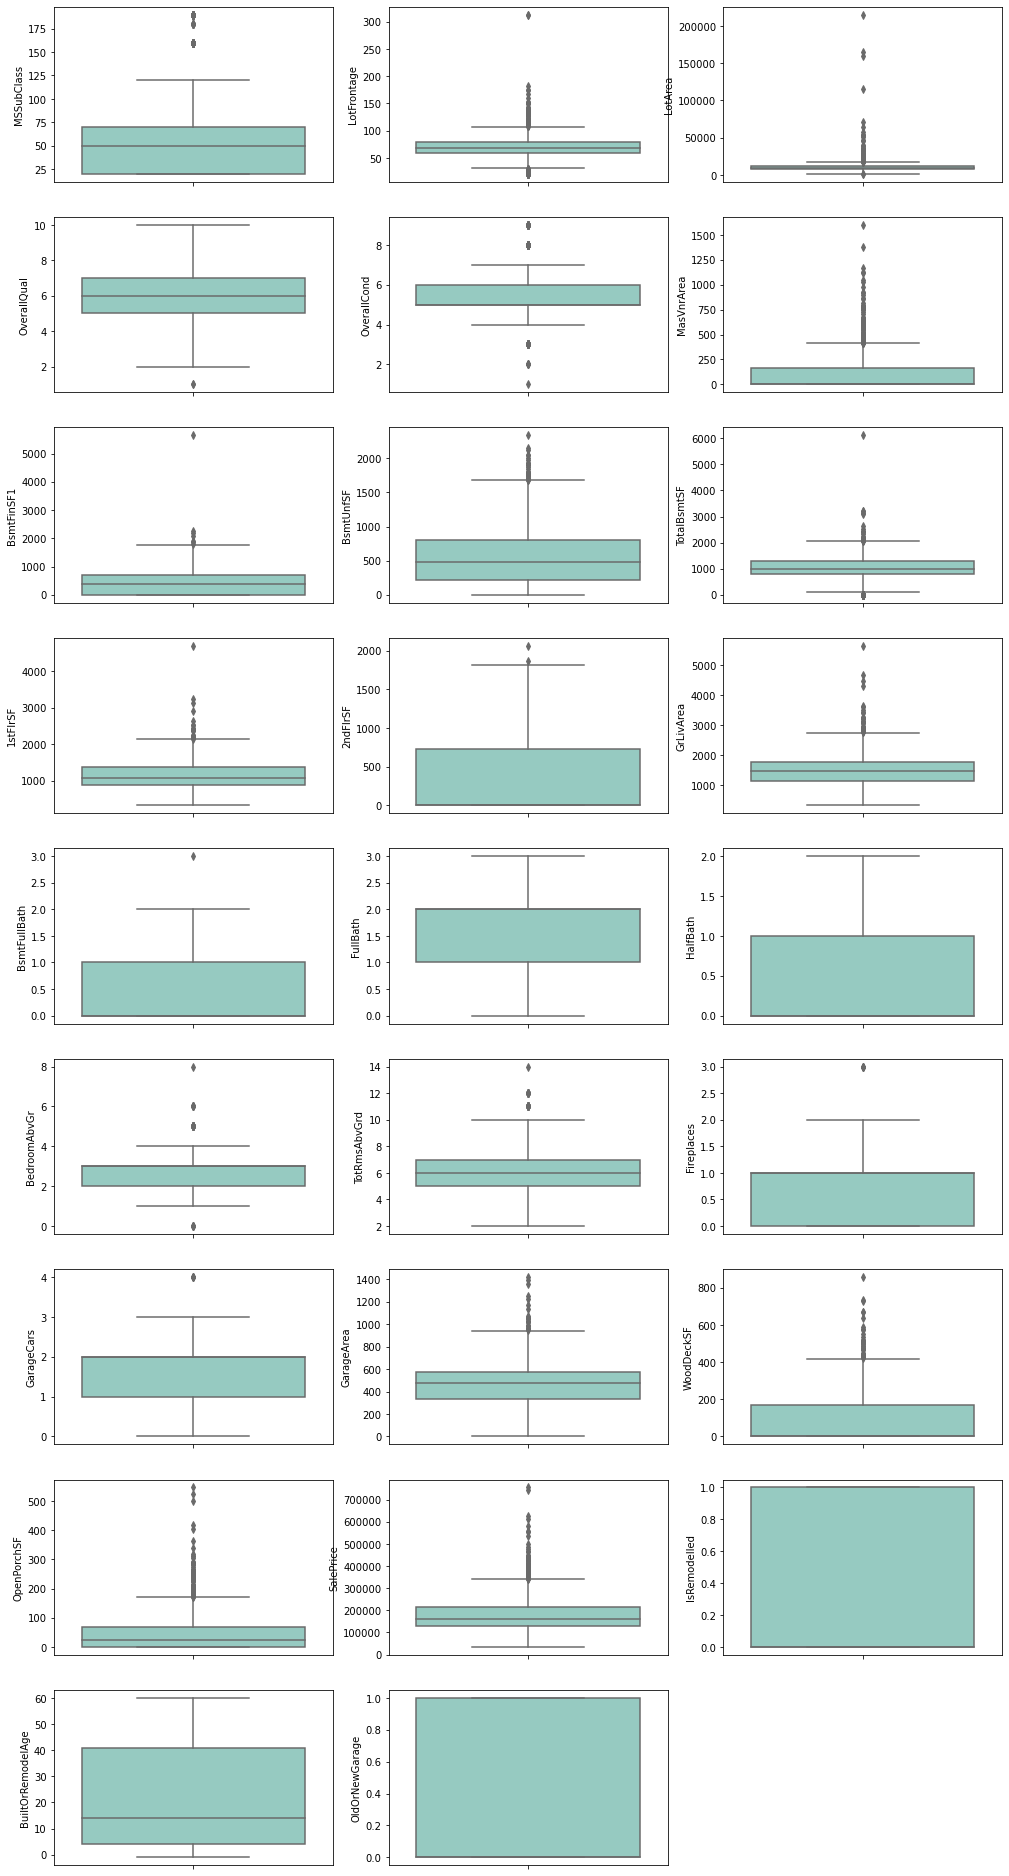

In [36]:
## Lets visualize the data
plt.figure(figsize=(17, 100))
count = 1
for col in numerical_columns:
    plt.subplot(len(numerical_columns),3,count)
    sns.boxplot(y = col, palette='Set3', data = df_house_price)
    count=count+1
plt.show()

#### We assume that the lower quantile 0.25 and upper quantile 0.99.

In [37]:
def drop_outliers(x):
    list = []
    for col in numerical_columns:
        Q1 = x[col].quantile(.25)
        Q3 = x[col].quantile(.99)
        IQR = Q3-Q1
        x =  x[(x[col] >= (Q1-(1.5*IQR))) & (x[col] <= (Q3+(1.5*IQR)))] 
    return x   

df_house_price = drop_outliers(df_house_price)

In [38]:
df_house_price.shape

(1453, 48)

In [39]:
# Determine the percentage of data retained
num_data = round(100*(len(df_house_price)/1460),2)
print(num_data)

99.52


**We are able to retain 99.52% data after data cleaning**